In [3]:
### Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Importing the dataset
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Neural Network\Self-organising-map\Credit_Card_Applications.csv")

In [5]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

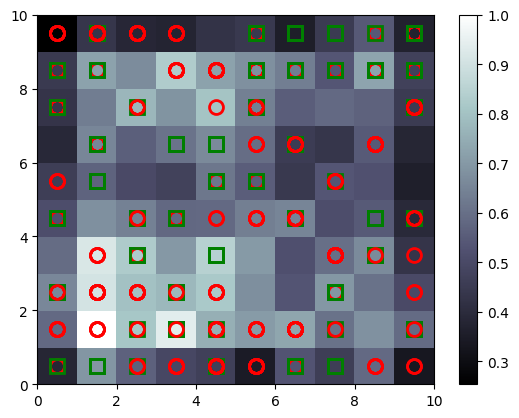

In [8]:
##Visualizing the results"""

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [9]:
## Finding the frauds

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
#creating matrix of features
customers = data.iloc[:, :-1].values

In [ ]:
# creating dependent variable
is_fraud = np.array(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i] = 1